In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/pranavtumkur/Predicting-Cancer-using-Support-Vector-Machines/master/cell_samples.csv')

In [5]:
df.head(20)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

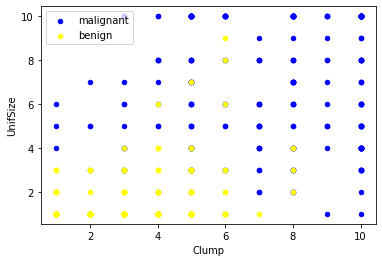

In [10]:
ax=df[df["Class"]==4].plot(kind='scatter', x='Clump', y='UnifSize', color='Blue', label='malignant');
df[df["Class"]==2].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)

## Data Preprocessing

In [11]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [12]:
import numpy as np

In [19]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df["BareNuc"]=df["BareNuc"].astype('int')

In [20]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [27]:
Features=df[["Clump", "UnifSize","UnifShape","MargAdh", "SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]].values
X=Features
X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [29]:
y=df["Class"].values
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

# Train/Test Set

In [30]:
from sklearn.model_selection import train_test_split

In [39]:
train_X, test_X, train_y, test_y=train_test_split(X,y,random_state=2, test_size=0.2 )
print("Train_data:",train_X.shape, train_y.shape)
print("Test_data:",test_X.shape, test_y.shape)

Train_data: (546, 9) (546,)
Test_data: (137, 9) (137,)


# Modeling 

In [40]:
from sklearn import svm

In [44]:
clf=svm.SVC(kernel='rbf')
clf.fit(train_X, train_y)

SVC()

In [47]:
yhat=clf.predict(test_X)
yhat[0:5]

array([4, 4, 2, 4, 2], dtype=int64)

# Accuracy

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
cnf=confusion_matrix(test_y,yhat)
cnf

array([[79,  4],
       [ 1, 53]], dtype=int64)

In [56]:
print (classification_report(test_y, yhat))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        83
           4       0.93      0.98      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [53]:
from sklearn.metrics import f1_score
f1_score(test_y, yhat,average='weighted') 

0.9636609875739336

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(test_y, yhat,pos_label=2)

0.9404761904761905